Model Training and Evaluation: Random Forest

In [ ]:
# %pip install --upgrade --force-reinstall 
# numpy==1.25.2 scipy==1.11.1 shap==0.42.1

SyntaxError: invalid syntax (3482482888.py, line 2)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import shap
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../Scripts"))

In [3]:
os.chdir('..')

In [10]:
from random_forest import *

,precision,recall,f1-score,support
0,0.998571,1.000000,0.999285,699.000000
1,0.000000,0.000000,0.000000,1.000000
accuracy,0.998571,0.998571,0.998571,0.998571
macro avg,0.499286,0.500000,0.499643,700.000000
weighted avg,0.997145,0.998571,0.997858,700.000000


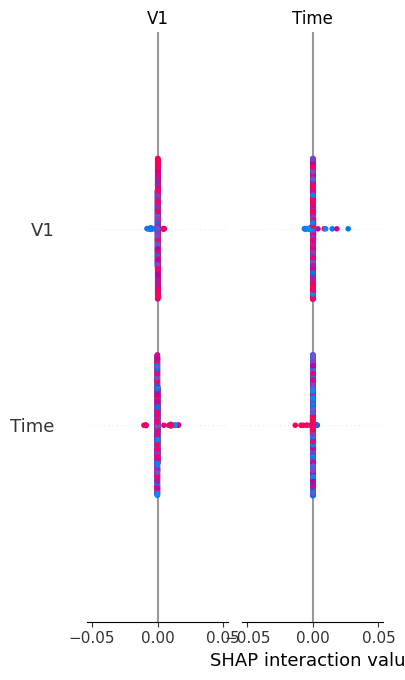

In [18]:
# ------------------------
# Run on fraud dataset (sample 3,500 records)
# ------------------------
fraud_df = pd.read_csv('Data/creditcard.csv')
clf, report_df, explainer, shap_values, X_test = train_evaluate_shap(fraud_df,target_column="Class", sample_size=3500, test_size=0.2, random_state=42)

# ------------------------
# Example SHAP plot
# ------------------------
shap.summary_plot(shap_values, X_test)

<Axes: xlabel='Amount', ylabel='Density'>

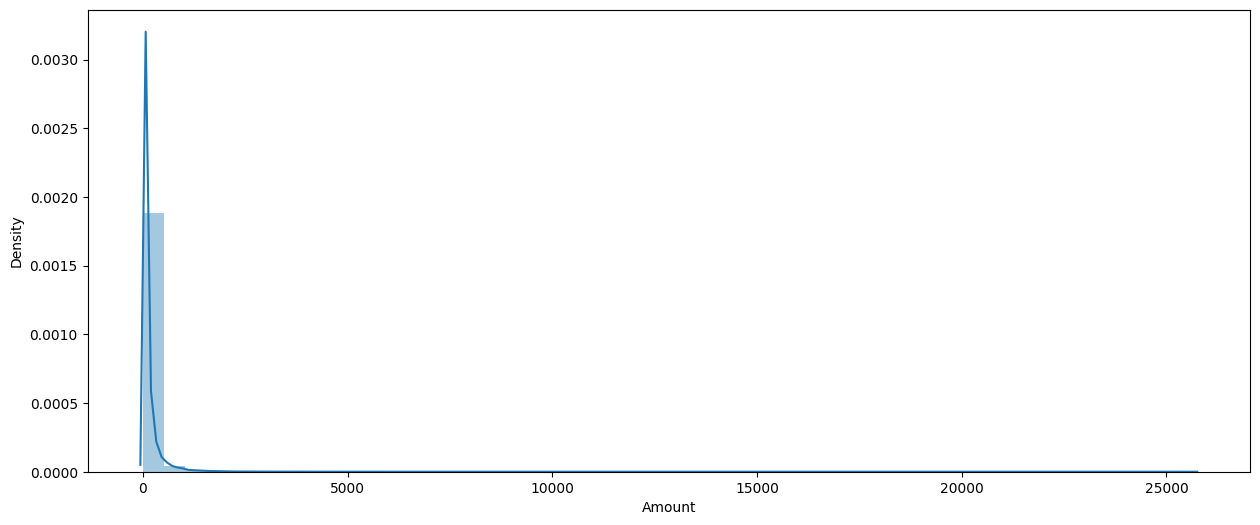

In [19]:
plt.figure(figsize=(15, 6))
sns.distplot(fraud_df['Amount'], bins=50)

AssertionError: 'shap_values' and 'features' values must have the same number of rows!

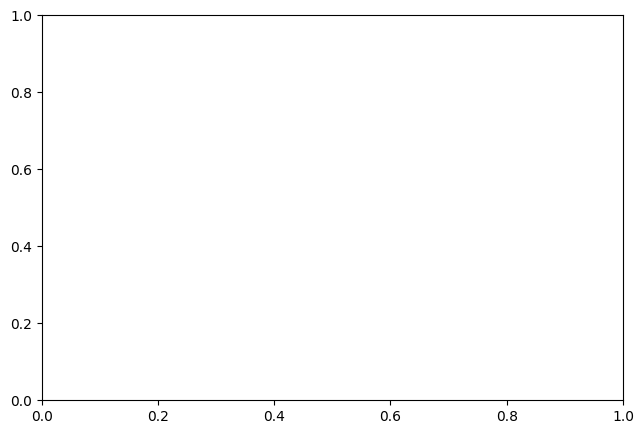

In [22]:
shap.dependence_plot("Amount", shap_values[0], X_test,interaction_index="V1")